# __Todo sobre el Analisis de Componentes Principales (PCA)__

## Como Funciona?

Supongamos que tenemos un dataset con solo 2 variables (x1 y x2) y 3 observaciones (A, B y C):

| Observación | x1 | x2 |
| ----------- | -- | -- |
| A           | 2  | 4  |
| B           | 0  | 0  |
| C           | -2 | -4 |

Vemos que x2 es el doble de x1 , es decir, ambas variables esta correlacionadas. PCA detectara esta correlacion.

### Paso 1: _Estandarizar los datos_

Realizamos este proceso para que PCA no esté sesgado por las escalas de las variables. Utilizamos la formula de la desviacion estandar ($z$) y de la varianza poblacional ($\sigma$) ya que son pocos datos:

$$z = \frac{x - \overline{x}}{\sigma}$$

$$\sigma = \sqrt{\frac{1}{n}\sum (x_{i} - \overline{x})^{2}}$$

Calculamos la media y desviacion estandar de cada variable:

- __Media de x1__: (2+0+(-2))/3 = 0
- __Media de x2__: (4+0+(-4))/3 = 0
- __std de x1__:
    - Resta la media a cada dato y elevar al cuadrado:
        
        (2-0)^2 = 4
        
        (0-0)^2 = 0
        
        (-2-0)^2 = 4
        
    - Promedia lo cuadrados dividiendo entre n
        
        varianza = (4 + 0 + 4)/3 = 8/3
        
    - Sacar la raiz cuadrada
        
        std = sqrt(varianza) = (8/3)^1/2 = 1.632
        
- __std de x2__:
    - Resta la media a cada dato y elevar al cuadrado:
        
        (4-0)^2 = 16
        
        (0-0)^2 = 0
        
        (-4-0)^2 = 16
        
    - Promedia lo cuadrados dividiendo entre n
        
        varianza = (16 + 0 + 16)/3 = 32/3
        
    - Sacar la raiz cuadrada
        
        std = sqrt(varianza) = (32/3)^1/2 = 3.266
        
    
Ahora, estandarizamos los datos

| Observación | x1\_std           | x2\_std           |
| ----------- | ----------------- | ----------------- |
| A           | 2 / 1.632 ≈ 1.225 | 4 / 3.266 ≈ 1.225 |
| B           | 0                 | 0                 |
| C           | -1.225            | -1.225            |



### Paso 2: _Calcular Matriz de Covarianza_

Es una matriz cuadrada donde cada valor muestra **cuánto varían dos variables juntas**: Los valores de la diagonal muestran la **varianza** de cada variable, mientras que los valores que estan fuera de la diagonal: muestra la **covarianza entre pares de variables**.

PCA busca encontrar **las direcciones (componentes)** donde los datos tienen mayor **varianza** y **menor redundancia**. Para eso, necesita saber:

- Qué variables están **correlacionadas**.
- Cuánta **varianza total** hay en el sistema.

 La **matriz de covarianza nos da exactamente esa información**.

Tomamos los datos estandarizados y formamos la matriz $Z$:

$$Z = \begin{bmatrix}
1.225  & 1.225 \\
 0 &  0\\
 -1.225 & -1.225 \\
\end{bmatrix}$$

La formula de la matriz de covarianza viene dada por:

$$Cov = \frac{1}{n-1}Z^{T}Z$$

donde:

- $Z^{T}$: es la transpuesta de $Z$.
- $n$: es el numero de observaciones (en este caso, 3).

Tranponemos la matriz $Z$, pasando filas a columnas y viceversa.

$$Z^{T} = \begin{bmatrix}
1.225 & 0 & -1.225 \\
1.225 & 0 & -1.225 \\
\end{bmatrix}$$

Realizamos la operacion de multiplicacion de matrices

$$Z^{T} = \begin{bmatrix}
1.225 & 0 & -1.225 \\
1.225 & 0 & -1.225 \\
\end{bmatrix}$$

Y calculamos cada elemento de la operacion:

- **[0,0]**: 1.2252+02+(−1.225)2=1.5+0+1.5=31.225^2 + 0^2 + (-1.225)^2 = 1.5 + 0 + 1.5 = 31.2252+02+(−1.225)2=1.5+0+1.5=3
- **[0,1]**: igual que [0,0] ⇒ 3
- **[1,0]**: también 3 (simétrico)
- **[1,1]**: también 3

Entonces,

$$ Z^{T}\cdot Z = \begin{bmatrix}
3 & 3 \\
3 & 3 \\
\end{bmatrix}$$

Ahora, dividimos por $n=3$ y obtenemos la Matriz de Covarianza

$$ Cov = C = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}$$


### Paso 3: _Calcular autovalores y autovectores_

Los autovectores nos dicen cuanta varianza captura cada componente; Mientra que lo autovectores indican la direccion de cada componente.

Para calcular los autovalores utilizamos la siguiente ecuacion:

$$det(\mathbf{C} - \lambda\mathbf{I}) = 0$$

donde

$$C = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix}, \mathbf{I} = \begin{bmatrix}
1 & 0 \\
0 & 1 \\
\end{bmatrix}$$

Entonces,

$$\begin{vmatrix}
1-\lambda & 1 \\
1 &  1-\lambda\\
\end{vmatrix} = (1 - \lambda)^{2} - 1 = 0$$

Resolviendo la matriz tenemos:

$$(1 - \lambda)^{2} = 1 \Rightarrow  1 - \lambda = \pm  1$$

Por tanto, los autovalores son:

$$\lambda_{1} = 2, \lambda_{2} = 0$$

Ahora, procedemos a calcular los autovectores $\mathbf{v_{1}}$ y $\mathbf{v_{2}}$:

- **Para $\lambda_{1} = 2$**

$$(\mathbf{C} - \lambda_{1}\mathbf{I})\mathbf{v_{1}} = 0$$

$$\begin{bmatrix}
-1 & 1 \\
1 & -1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\mathbf{v_{1}} \\ \mathbf{v_{2}}
\end{bmatrix} = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

nos lleva a la ecuacion,

$$-v_{1} + v_{2} = 0 \Rightarrow v_{1} = v_{2}$$

Entonces,

$$\mathbf{v_{1}} = \begin{bmatrix}
1 \\ 1
\end{bmatrix}$$

Normalizando, obtenemos el autorvector $\mathbf{v_{1}}$, 

$$\mathbf{v_{1}} = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\ 1
\end{bmatrix} = \begin{bmatrix}
0.707 \\ 0.707
\end{bmatrix}$$

- **Para $\lambda_{2} = 0$**

$$(\mathbf{C} - \lambda_{2}\mathbf{I})\mathbf{v_{2}} = \begin{bmatrix}
1 & 1 \\
1 & 1 \\
\end{bmatrix} \cdot \begin{bmatrix}
\mathbf{v_{1}} \\ \mathbf{v_{2}}
\end{bmatrix} = \begin{bmatrix}
0 \\ 0
\end{bmatrix}$$

nos lleva a la ecuacion,

$$v_{1} + v_{2} = 0 \Rightarrow v_{1} = -v_{2}$$

Un vector solucion seria,

$$\mathbf{v_{2}} = \begin{bmatrix}
1 \\ -1
\end{bmatrix}$$

Normalizando, obtenemos el autorvector $\mathbf{v_{2}}$

$$\mathbf{v_{2}} = \frac{1}{\sqrt{2}}\begin{bmatrix}
1 \\ -1
\end{bmatrix} = \begin{bmatrix}
0.707 \\ -0.707
\end{bmatrix}$$

### Paso 4: _Tranformar los datos_

Proyectamos los datos en los nuevos ejes dados por los componentes principales. Para ello, utilizamos la siguiente formula:

$$Z_{PCA} = Z \cdot \text{Matriz de autovectores}$$

Sustituyendo, tenemos:

$$Z_{PCA} = \begin{bmatrix}
1.225 & 1.225 \\
0 & 0 \\
-1.225 & -1.225 \\
\end{bmatrix} \cdot \begin{bmatrix}
0.707 & -0.707 \\
0.707 & 0.707 \\
\end{bmatrix} = \begin{bmatrix}
1.733 & 0 \\
0 & 0 \\
-1.733 & 0 \\
\end{bmatrix}$$

__Conclusiones__

A partir de la nueva matriz $Z_{PCA}$ podemos concluir lo siguiente:

- Solo la primer componente $(PC1)$ tiene valores ditinto de cero. Esto indica que toda la informacion esta en 1 sola dimension.
 
- La segunda componente $(PC2)$ no agrega nada util: toda su varianza es cero. 

- Esto implica que podemos reducir de 2 a 1 dimension sin perder informacion.

## PCA en el conjunto de datos IRIS

Este conjunto de datos consta de cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. Utilizamos el análisis de componentes principales (PCA) para proyectar este espacio de cuatro características en un espacio tridimensional.

### Cargar datos

In [ ]:
from sklearn.datasets import load_iris

# a_frame, muetra los datos en formato df
iris = load_iris(as_frame=True)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

### Grafico de pares de caracteristicas

In [ ]:
iris.frame['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

El target esta identificado con numeros enteros para cada especie. Vamos a renombrar el target con el nombre real de las especies

In [11]:
iris.frame['target'] = iris.target_names[iris.target]
iris.frame['target']

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: target, Length: 150, dtype: object

Graficamos pares de caracteristicas de todas las especies entre si.

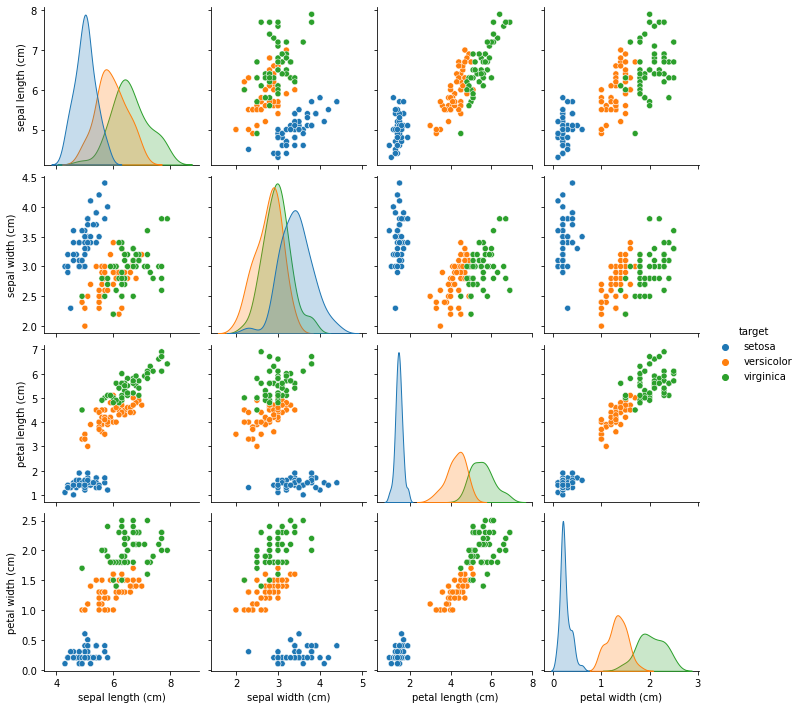

In [12]:
import seaborn as sns

_ = sns.pairplot(iris.frame, hue='target')

> Ya se puede observar un patrón en el tipo Setosa, fácilmente identificable por su sépalo corto y ancho. 

> Considerando únicamente estas dos dimensiones (ancho y largo del sépalo), aún existe una superposición entre los tipos Versicolor y Virginica.

> Observamos que el ancho y la longitud del pétalo son las características más discriminantes para los tres tipos.

### Representacion Grafica PCA

Apliquemos un Análisis de Componentes Principales (PCA) al conjunto de datos del iris y luego grafiquemos los iris en las tres primeras dimensiones del PCA. Esto nos permitirá diferenciar mejor los tres tipos.

El objetivo es reducir los datos de iris de 4 a 3 dimensiones y graficarlos en 3D.

In [15]:
from sklearn.decomposition import PCA

# aplicar PCA para reducir a 3d
X_reduce = PCA(n_components=3).fit_transform(iris.data)

# mostrar primeras 3 transformaciones
X_reduce[:3]

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026]])

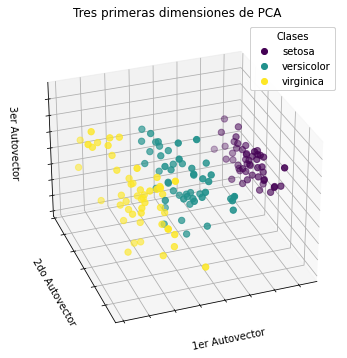

In [17]:
import matplotlib.pyplot as plt

# crear grafico
fig = plt.figure(1, figsize=(8,6))
# elev y azim definen el angulo de la vista
ax = fig.add_subplot(111, projection='3d', elev=-150, azim=110)

# Graficar datos en 3D
scatter = ax.scatter(
    X_reduce[:, 0],
    X_reduce[:, 1],
    X_reduce[:, 2],
    c=iris.target,  # colorear cada punto segun la clase
    s=40            # size de los puntos
)

ax.set(
    title = 'Tres primeras dimensiones de PCA',
    xlabel = '1er Autovector',
    ylabel = '2do Autovector',
    zlabel = '3er Autovector',
)

# ocultar etiquetas numericas en los ejes
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# agregar leyenda
leyend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc='upper right',
    title='Clases'
)
ax.add_artist(leyend1)

plt.show()


> PCA crea tres nuevas características que son una combinación lineal de las cuatro características originales.

> Esta transformación maximiza la varianza lo que permite identificar cada especie utilizando únicamente la primera característica

## PCA Incremental

IPCA se utiliza generalmente como sustituto del análisis de componentes principales (PCA) cuando el conjunto de datos a descomponer es demasiado grande para caber en la memoria.  Si bien sigue dependiendo de las características de los datos de entrada, modificar el tamaño del lote permite controlar el uso de la memoria.

No escala los datos de entrada, como PCA.

El siguiente ejemplo muestra de forma visual que el IPCA es capaz de encontrar una proyección de datos similar a la del PCA (a una inversión de signo), procesando solo unas pocas muestras a la vez.

Vamos a utilizar los datos de Iris pero en este caso vamos a pasar de 4 a 2 dimensiones.

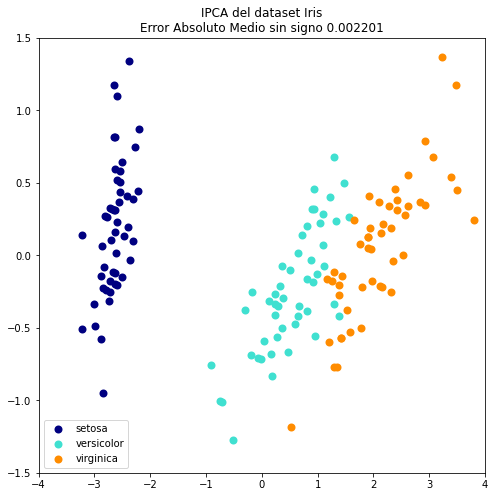

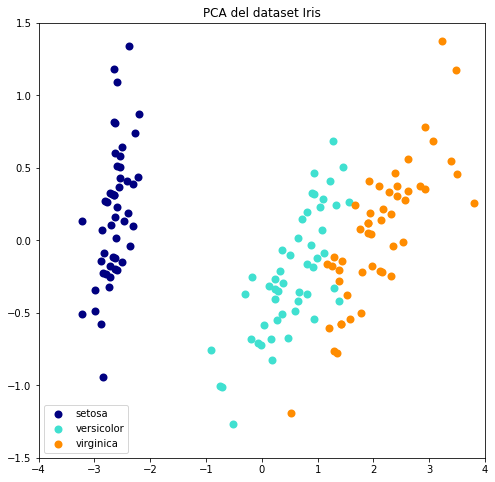

In [20]:
import numpy as np
from sklearn.decomposition import PCA, IncrementalPCA

# dividimos los datos en features y target
X = iris.data
y = iris.target

# Aplicamos IPCA
n_componentes = 2
ipca = IncrementalPCA(n_components=n_componentes, batch_size=10)
X_ipca = ipca.fit_transform(X)

# Aplicamos PCA
pca = PCA(n_components=n_componentes)
X_pca = pca.fit_transform(X)

# lista de colores para cada clase
colores = ['navy', 'turquoise', 'darkorange']

for X_tranformed, title in [(X_ipca, 'IPCA'), (X_pca, 'PCA')]:
    
    plt.figure(figsize=(8,8))
    for color, i, target_name in zip(colores, [0,1,2], iris.target_names):

        plt.scatter(
            X_tranformed[y == i, 0],
            X_tranformed[y == i, 1],
            color = color,
            lw = 2,
            label = target_name
        ) 

    if 'IPCA' in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + ' del dataset Iris\nError Absoluto Medio sin signo %.6f' % err)
    else:
        plt.title(title + ' del dataset Iris')
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.axis([-4,4,-1.5,1.5])

plt.show()

> El error absoluto medio es muy bajo lo que implica que ambos metodos son muy parecidos.

> IPCA aproxima bastante bien a PCA pero con menos consumo de memoria.

## Kernel PCA

Es una extensión del Análisis de Componentes Principales (PCA) que permite aplicar la técnica a datos no linealmente separables. Mientras que el PCA tradicional proyecta los datos en una base lineal, el Kernel PCA transforma primero los datos a un espacio de mayor dimensión (no lineal) y luego aplica PCA en ese nuevo espacio.

### En que consiste

1. KPCA utiliza una función kernel para mapear los datos a un espacio de características de mayor dimensión sin hacerlo explícitamente. Esto se conoce como el "truco del kernel".

2. Una vez en ese nuevo espacio (a través del kernel), aplica PCA como si fuera lineal, pero ahora puede capturar patrones no lineales.

3. No necesita conocer la funcion de mapeo gracias al truco del kernel, solo necesitas calcular productos escalares entre puntos en el espacio transformado, lo cual se hace usando la función kernel directamente.

### Tipos comunes de Kernel

- __Lineal__: equivalente a PCA estándar. En scikit-learn 'linear'. Util en datos que sean linealmente separables

- __Polinomial__: permite capturar relaciones polinómicas no lineales. En scikit-learn 'poly'.

- __RBF__ (Radial Basis Function o Gaussiano): muy útil para datos con separación no lineal. En scikit-learn 'rbf'.

- __Sigmoide__: funciona cuando los dato tienen transiciones suaves como las que modelan las redes neuronales. En scikit-learn 'sigmoid'. 

- __Kernel peronalizado__: Cuando necesitas un kernel específico para tu problema (por ejemplo, kernels basados en texto, grafos, o series temporales).

### Implementacion

Vamos a mostrar la ventaja de usar un kernel al proyectar datos mediante un PCA. Creamos un conjunto de datos compuesto por dos circulos anidados en el que claramente se tratan de datos no lineales. 

In [1]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split

# crear los datos de prueba. Features y target
# factor controla el radio relativo entre circulos
X, y = make_circles(n_samples=1000, factor=0.3, noise=0.05, random_state=42)

# dividir datos en entrenamiento y prueba
# stratify asegura que la proporcion de clases e mantenga igual en ambos circulos
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

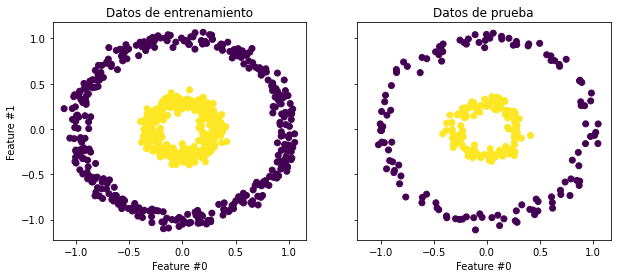

In [6]:
# visualicemos los datos generados
import matplotlib.pyplot as plt

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10, 4))

train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Datos de entrenamiento")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Datos de prueba")

> Las muestras de cada clase no se pueden separar linealmente.

Ahora, vamos a implementar PCA y Kernel PCA para ver su efectos. Para el kernel utilizamos 'rbf' ya que concuerda con la forma que presentan los datos. 

In [29]:
from sklearn.decomposition import PCA, KernelPCA

# definimos PCA
pca = PCA(n_components=2)

# definimos KPCA
kpca = KernelPCA(
    n_components=None,
    kernel='rbf',
    gamma=9,                   # controla la forma del kernel
    fit_inverse_transform=True, # permite aroximar el mapeo inverso dese el espacio reucido al original
    alpha=0.1                   # regula la reconstruccion inversa
)

# obtener version reducida linealmente de los datos de prueba 
X_test_pca = pca.fit(X_train).transform(X_test)
# obtener version reducida en un espacio no lineal transformado de los datos de prueba
X_test_kpca = kpca.fit(X_train).transform(X_test)


Visualicemos los datos con los metodos implementados para compararlos

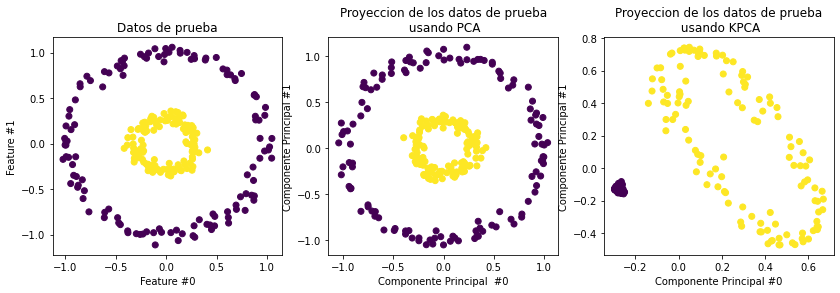

In [30]:
# configuracion de graficos
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax) = plt.subplots(
    ncols=3, figsize=(14, 4)
)

# grafico de los datos de prueba originales
orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Datos de prueba")

# grafico de los datos de prueba con PCA
pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test)
pca_proj_ax.set_ylabel("Componente Principal #1")
pca_proj_ax.set_xlabel("Componente Principal  #0")
pca_proj_ax.set_title("Proyeccion de los datos de prueba\n usando PCA")

# grafico de los datos de prueba con KPCA
kernel_pca_proj_ax.scatter(X_test_kpca[:, 0], X_test_kpca[:, 1], c=y_test)
kernel_pca_proj_ax.set_ylabel("Componente Principal #1")
kernel_pca_proj_ax.set_xlabel("Componente Principal #0")
_ = kernel_pca_proj_ax.set_title("Proyeccion de los datos de prueba\n usando KPCA")

> PCA transforma los datos linealmente. Esto significa que el sistema de coordenadas se centrará, se reescalará en cada componente con respecto a su varianza y, finalmente, se rotará. Sin embargo, en la grafica central observamos que no hay cambios en el escalamiento, solamente han sido rotados.  Dicha proyección no sería útil si se definiera un clasificador lineal para distinguir muestras de ambas clases.

> KPCA permite realizar una proyección no lineal. Al usar un kernel RBF, esperamos que la proyección despliegue el conjunto de datos, conservando aproximadamente las distancias relativas de los pares de puntos de datos cercanos en el espacio original. En la grafica de la derecha se evidencia que las muestras de una clase dada están más próximas entre sí que las muestras de la clase opuesta, lo que desenreda ambos conjuntos de muestras. Ahora, podemos usar un clasificador lineal para separar las muestras de las dos clases.

## PCA desde la intuicion

Vamos a generar un pequeno conjunto de datos 3D, con forma ovalada, rotada y con puntos distribuidos de forma irregular con bastante ruido

In [2]:
import numpy as np
from scipy.spatial.transform import Rotation

# cantidad de puntos a generar
m = 60
# crea los puntos en 3D
X = np.zeros((m, 3))  
# semilla
np.random.seed(42)
# distribuye los puntos en una curva tipo elipse
angles = (np.random.rand(m) ** 3 + 0.5) * 2 * np.pi  
# asigna las coordenadas 2D del plano x,y (forma ovalada)
X[:, 0], X[:, 1] = np.cos(angles), np.sin(angles) * 0.5
# agrega ruido a cada componente x,y,z
X += 0.28 * np.random.randn(m, 3)  # add more noise
# crea una rotacion 3D a los datos
X = Rotation.from_rotvec([np.pi / 29, -np.pi / 20, np.pi / 4]).apply(X)
# mueve el centro de la nube de puntos
X += [0.2, 0, 0.2]  

Graficamos los dato 3D, con el plano de proyeccion

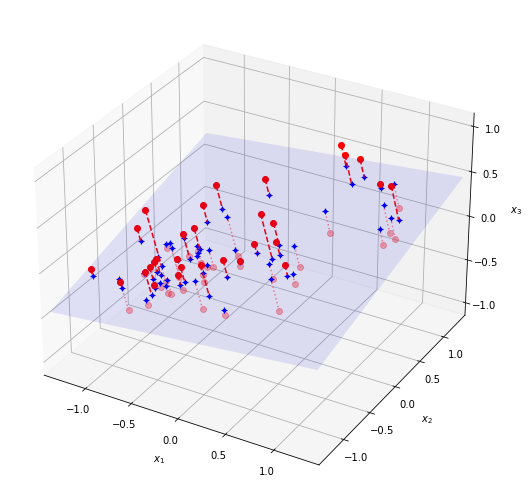

In [3]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)  # dataset reduced to 2D
X3D_inv = pca.inverse_transform(X2D)  # 3D position of the projected samples
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)

axes = [-1.4, 1.4, -1.4, 1.4, -1.1, 1.1]
x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 10),
                     np.linspace(axes[2], axes[3], 10))
w1, w2 = np.linalg.solve(Vt[:2, :2], Vt[:2, 2])  # projection plane coefs
z = w1 * (x1 - pca.mean_[0]) + w2 * (x2 - pca.mean_[1]) - pca.mean_[2]  # plane
X3D_above = X[X[:, 2] >= X3D_inv[:, 2]]  # samples above plane
X3D_below = X[X[:, 2] < X3D_inv[:, 2]]  # samples below plane

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111, projection="3d")

# plot samples and projection lines below plane first
ax.plot(X3D_below[:, 0], X3D_below[:, 1], X3D_below[:, 2], "ro", alpha=0.3)
for i in range(m):
    if X[i, 2] < X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], ":", color="#F88")

ax.plot_surface(x1, x2, z, alpha=0.1, color="b")  # projection plane
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b+")  # projected samples
ax.plot(X3D_inv[:, 0], X3D_inv[:, 1], X3D_inv[:, 2], "b.")

# now plot projection lines and samples above plane
for i in range(m):
    if X[i, 2] >= X3D_inv[i, 2]:
        ax.plot([X[i][0], X3D_inv[i][0]],
                [X[i][1], X3D_inv[i][1]],
                [X[i][2], X3D_inv[i][2]], "r--")

ax.plot(X3D_above[:, 0], X3D_above[:, 1], X3D_above[:, 2], "ro")

def set_xyz_axes(ax, axes):
    ax.xaxis.set_rotate_label(False)
    ax.yaxis.set_rotate_label(False)
    ax.zaxis.set_rotate_label(False)
    ax.set_xlabel("$x_1$", labelpad=8, rotation=0)
    ax.set_ylabel("$x_2$", labelpad=8, rotation=0)
    ax.set_zlabel("$x_3$", labelpad=8, rotation=0)
    ax.set_xlim(axes[0:2])
    ax.set_ylim(axes[2:4])
    ax.set_zlim(axes[4:6])

set_xyz_axes(ax, axes)
ax.set_zticks([-1, -0.5, 0, 0.5, 1])

plt.show()

Obtenemos solamente el plano de proyeccion en 2D

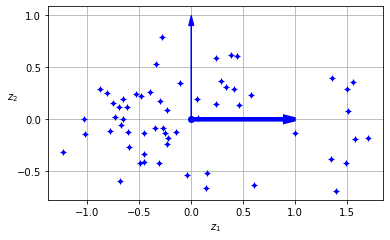

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(X2D[:, 0], X2D[:, 1], "b+")
ax.plot(X2D[:, 0], X2D[:, 1], "b.")
ax.plot([0], [0], "bo")
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=4)
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='b', ec='b', linewidth=1)
ax.set_xlabel("$z_1$")
ax.set_yticks([-0.5, 0, 0.5, 1])
ax.set_ylabel("$z_2$", rotation=0)
ax.set_axisbelow(True)
ax.grid(True)
plt.show()

### Obtener las componentes principales de forma manual

Vamos a obtener las componentes principales del conjunto de entrenamiento anterior con la funcion _svd()_. Luego, extraemos los dos vectores unitarios que definen las dos PCs.

In [ ]:
import numpy as np

# resta la media de cada columna a todos los datos
X_centered = X - X.mean(axis=0)
# Decomposicion de valores singulares
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt[0]
c2 = Vt[1]

El algoritmo de factorización SVD descompone una matriz en tres componentes: $U$, $Σ$ y $V$, tales que 

$$X = UΣV^{T}$$

donde 
- $X$ es la matriz original de los datos.
- $U$ es una matriz de m × m de vectores ortogonales (Autovectores de $XX^{T}$) 
- $Σ$ es una matriz diagonal m × n con los autovalores ordenados de mayor a menor. 
- $V^{T}$ es la transpuesta de la matriz de n × n de autovectores ($X^{T}X$). 

Sin embargo, la función _svd()_ devuelve  $s$ en vez de $Σ$. '$s$' es el vector que contiene todos los autovalores en la diagonal principal de las _n_ primeras filas de $Σ$. Dado que $Σ$ está lleno de ceros en el resto de la matriz, se puede reconstruir fácilmente a partir de $s$, de la siguiente manera:

In [ ]:
# definir numero de muestras y caracteristicas
m, n = X.shape
# crear matriz de ceros con la misma forma de X_centered
Σ = np.zeros_like(X_centered)
# inserta los autovalores de s en la diagonal
Σ[:n, :n] = np.diag(s)
# verificar que la descompoicion es valida
assert np.allclose(X_centered, U @ Σ @ Vt)

- Las filas de $V^{T}$ representan las direcciones principales del espacio de caracteristiscas.

- Los elementos de la diagonal de $Σ$ indican cuanta variacion hay en cada direccion. Cuanto mayor es el valor, mas importante es esa direccion para representar los datos.

- Las columnas de $U$ indican las direcciones de los datos en el espacio original

In [ ]:
print('Matriz U: ',U)
print('='*64)
print('Matriz de autovalores Σ: 'Σ)
print('='*64)
print('Matriz de autovectores: 'Vt)

[[-0.14714487 -0.11089241 -0.02880011 ... -0.03805276 -0.03723821
  -0.2192027 ]
 [ 0.02508808  0.19383174 -0.24368813 ...  0.06826983  0.10135187
  -0.07801631]
 [ 0.22768873 -0.15038013 -0.09929828 ... -0.02809897  0.33694065
  -0.13209084]
 ...
 [-0.04977645 -0.06776359 -0.01171058 ...  0.99389532  0.00285825
  -0.00441331]
 [-0.10303688  0.04503911  0.3375688  ...  0.00478077  0.89469863
   0.03234272]
 [-0.17139152  0.05364348 -0.19282106 ... -0.01075476  0.05289398
   0.93195606]]
[[5.93449971 0.         0.        ]
 [0.         2.65661127 0.        ]
 [0.         0.         2.04831319]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.         0.         0.        ]
 [0.

Identificado todos los componentes principales, puede reducir la dimensionalidad del conjunto de datos hasta _d_ dimensiones proyectándolo en el hiperplano definido por los primeros _d_ componentes principales. Seleccionar este hiperplano garantiza que la proyección conserve la mayor variación posible.

Para proyectar el conjunto de entrenamiento en el hiperplano y obtener un conjunto de datos reducido $X_d$, calculamos la multiplicación matricial del conjunto de entrenamiento $X$ por la matriz $W_d$ definida como la matriz que contiene las primeras _d_ columnas de $V$.

$$X_{d-proj} = XW_d$$

Veamos como hacerlo en Python para el ejemplo anterior


In [11]:
# seleccionar dos primeras PCs y trasponerla
W2 = Vt[:2].T
# proyecta los datos centrados sobre las dos PCs
X2D = X_centered @ W2
# mostrar nuevo conjunto de datos reducidos a 2D
print(X2D)

[[-8.73231190e-01 -2.94598030e-01]
 [ 1.48885182e-01  5.14935573e-01]
 [ 1.35121872e+00 -3.99501548e-01]
 [ 4.54366763e-01 -1.39984497e-01]
 [-7.34389086e-01 -2.28934648e-02]
 [-2.33347464e-01 -8.67844755e-02]
 [-8.08435321e-01 -2.52457557e-01]
 [ 1.48281454e+00  4.22796305e-01]
 [ 3.85679006e-01 -6.16229365e-01]
 [ 1.54972180e+00 -3.60381563e-01]
 [-1.22938760e+00  3.12504780e-01]
 [-4.54653275e-01  3.28839370e-01]
 [ 1.34315899e+00  3.79446240e-01]
 [-6.55233341e-01 -1.92367174e-01]
 [-2.49510114e-01  1.28486810e-01]
 [-3.46562831e-01  8.32312189e-02]
 [-6.90221113e-01 -1.13712645e-01]
 [-5.29757591e-01 -2.40403321e-01]
 [-3.96344855e-01 -2.60334107e-01]
 [-6.19519220e-01 -1.13588889e-01]
 [ 3.34910399e-01 -3.09476565e-01]
 [-4.52441114e-01  1.28501562e-01]
 [-1.02718730e+00 -7.20555799e-03]
 [ 2.34128174e-01 -1.50077825e-01]
 [-3.37764152e-01 -5.30112382e-01]
 [ 1.69474397e+00  1.82984269e-01]
 [-1.09314174e-01 -3.51175914e-01]
 [ 4.35623436e-01 -6.12839802e-01]
 [ 2.35325731e-01 -5

### Usando Scikit-Learn para implementar PCA

Esta libreria implementa PCA centrando los datos automaticamente. Vamos a reducir la dimensionalidad del conjunto de datos a 2 dimensiones.

In [3]:
# importamos el metodo
from sklearn.decomposition import PCA

# instanciamos el objeto PCA
pca = PCA(n_components=2)

# reducir datos a 2 dimensiones
X2D = pca.fit_transform(X)

X2D

array([[-8.73231190e-01,  2.94598030e-01],
       [ 1.48885182e-01, -5.14935573e-01],
       [ 1.35121872e+00,  3.99501548e-01],
       [ 4.54366763e-01,  1.39984497e-01],
       [-7.34389086e-01,  2.28934648e-02],
       [-2.33347464e-01,  8.67844755e-02],
       [-8.08435321e-01,  2.52457557e-01],
       [ 1.48281454e+00, -4.22796305e-01],
       [ 3.85679006e-01,  6.16229365e-01],
       [ 1.54972180e+00,  3.60381563e-01],
       [-1.22938760e+00, -3.12504780e-01],
       [-4.54653275e-01, -3.28839370e-01],
       [ 1.34315899e+00, -3.79446240e-01],
       [-6.55233341e-01,  1.92367174e-01],
       [-2.49510114e-01, -1.28486810e-01],
       [-3.46562831e-01, -8.32312189e-02],
       [-6.90221113e-01,  1.13712645e-01],
       [-5.29757591e-01,  2.40403321e-01],
       [-3.96344855e-01,  2.60334107e-01],
       [-6.19519220e-01,  1.13588889e-01],
       [ 3.34910399e-01,  3.09476565e-01],
       [-4.52441114e-01, -1.28501562e-01],
       [-1.02718730e+00,  7.20555799e-03],
       [ 2.

Ahora, podemos obtener las componentes principales usando el metodo _components_

In [4]:
pca.components_

array([[ 0.67857588,  0.70073508,  0.22023881],
       [ 0.72817329, -0.6811147 , -0.07646185]])

### Relacion de varianza explicada

El indice de varianza explicada indica la proporcion de la varianza del conjunto de datos que se encuentra a lo largo de cada componente principal. En sklearn se implementa utilizando el metodo _explained_variance_ratio_. Veamos como obtener este indice para el conjunto de datos 3D.

In [5]:
pca.explained_variance_ratio_

array([0.7578477 , 0.15186921])

> El primer valor indica que el 76% de la variacion del conjunto de datos se encuentra a lo largo de la primera PC

> El segundo valor indica que el 15% se encuentra a lo largo de la segunda PC.

> El restante 9% para la tercera PC, por lo que esta aporta poca informacion.